# Youtube Data Analysis Case Study

### Problem Statement
####  In this case study we are analysing
####   1. Sentiment Anaysis
####   2. WordCloud Analysis
#####    -Positive Wordcloud Analysis
#####    -Negative WordCloud Analysis
####   3. Emoji Analysis
####   4. Collecting Entire data from the databases
####   5. Export data into csv, json, databases etc
####   6. Analysing Most Likes category 
####   7. Audience Engagement on the basis of the Likes rate, dislikes rate, comment rate
#####   - With the Boxpot
#####   - Correlation Matrix Heatmap
####   8. Channels having largest number of trending videos
####   9. Analysig the Punctuation Impact on views,likes, dislikes

### Importing modules

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading database 

#### Use on_bad_lines for the parsing error

In [115]:
comments = pd.read_csv(r'C:\Users\Admin\Downloads\Youtube_project_shan_singh_Udemy\UScomments.csv', on_bad_lines='skip')

### Show firts five data from the database

In [116]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


### Show the sum of the null values in the database

In [117]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

### Dropping null values from the database
#### Drop only if there are few missing values

In [118]:
comments.dropna(inplace=True)

### Show the sum of the null values in the database

In [119]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 1. Sentiment Analysis

### Install the Sentiment Analysis Package

In [120]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import the Sentiment Analysis Package

In [121]:
from textblob import TextBlob

### Show the first five data in the database

In [122]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


### Using the sentiment analysis package ("TextBlob") and and getting the sentiment polarity of the single comment from the column comment_text of the Database

#### Important Code 1

In [123]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

## Sentiment Polarity on the test dataset

### Creating a test Dataset for the test purpose

In [124]:
sample_df = comments[0:10000]

In [125]:
sample_df.shape

(10000, 4)

### Checking the shape/Structure of the Dataset


In [126]:
comments.shape

(691374, 4)

### Creating a array for storing the sentiment polarity
### Iterating and the exception handling on the important code 1 from the above on the test dataset

In [127]:
polarity = []

for comment in sample_df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

### Checking the length of the polarity array

In [128]:
len(polarity)

10000

### Adding the polarity array into the test dataset

In [129]:
sample_df['polarity'] = polarity

### Checking whether the polarity array has been added into the test dataset

In [130]:
sample_df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 2. WordCloud Analysis

### Creating a positive comments filter of the test database with the help of polarity for the WordCloud

In [131]:
filter1 = sample_df['polarity']==1

In [132]:
sample_df_positive = sample_df[filter1]

### Checking whethetr the positive comment filter is ready or not

In [133]:
sample_df_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


### Creating a negative comments filter of the test database with the help of polarity for the WordCloud


In [134]:
filter2 = sample_df['polarity']== -1

In [135]:
sample_df_negative = sample_df[filter2]

### Checking whethetr the negative comment filter is ready or not

In [136]:
sample_df_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


### Installing the WordCloud

In [137]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing the WordCloud as well as the Stopwords

In [138]:
from wordcloud import WordCloud , STOPWORDS

### Checking the list of STOPWORDS

In [139]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

### checking the comments of the test dataset

In [140]:
sample_df['comment_text']

0                        Logan Paul it's yo big day ‼️‼️‼️
1        I've been following you from the start of your...
2                       Say hi to Kong and maverick for me
3                                      MY FAN . attendance
4                                               trending 😉
                               ...                        
9996        All the people saying a Tsunami is coming... 🙄
9997                 Lools like the glowing sea in fallout
9998                        The Simpsons were right again!
9999                                 So is the water back?
10000    So that's it huh, we're some kind of dried up ...
Name: comment_text, Length: 10000, dtype: object

### Checking the type of the comments 

In [141]:
type(sample_df['comment_text'])

pandas.core.series.Series

### With the help of the join we are going to club the whole positive comments and convert it from the series to the string

In [142]:
total_comments_positive = ' '.join(sample_df_positive['comment_text'])

### With the help of the following line we are going to remove the stopwords from the clubbed string and generate it to the positive words

In [143]:
wordCloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

#### Plotting the positive wordcloud 

(-0.5, 399.5, 199.5, -0.5)

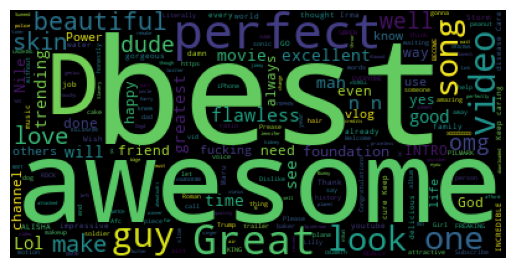

In [144]:
plt.imshow(wordCloud)
plt.axis('off')

### With the help of the join we are going to club the whole negative comments and convert it from the series to the string

In [145]:
total_comments_negative = ' '.join(sample_df_negative['comment_text'])

### With the help of the following line we are going to remove the stopwords from the clubbed string and generate it to the negative words

In [146]:
wordCloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

### Plotting the negative wordcloud 

(-0.5, 399.5, 199.5, -0.5)

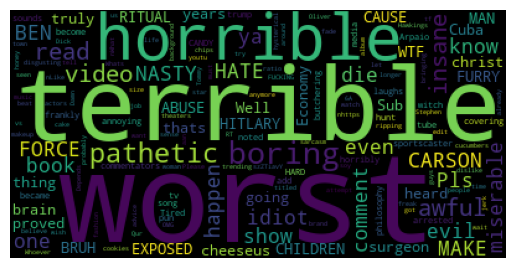

In [147]:
plt.imshow(wordCloud2)
plt.axis('off')

## 3. Emoji Analysis

### Installing emoji of version 2.2.0

In [148]:
!pip install emoji==2.2.0


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing the package emoji

In [149]:
import emoji

### Checking the version of the package emoji

In [150]:
emoji.__version__


'2.2.0'

### checking the test Dataset

In [151]:
sample_df['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

### taking a sample comment from the test dataset

In [152]:
comment1 = 'trending 😉'

### iterating the sample comment above to test whether the emoji library is working or not

In [153]:
[char for char in comment1 if char in emoji.EMOJI_DATA]

['😉']

### A simpler representation of the above iteration

In [154]:
emoji_list = []
for char in comment1:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

### checking the whether the emoji is being appended in the list or not

In [155]:
emoji_list

['😉']

### iterating the test dataset for getting the required goals of the emoji and appending into the list

In [156]:
all_emoji_list = []
for comment in sample_df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

### Checking the first 10 emoji in the list to check whether the all the emojis have been separated or not

In [157]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

### Importing the Counter from the Collections Pakage

In [158]:
from collections import Counter

### Chcking the 10 most common emojis in the whole emojji list with the help of the counter

In [159]:
Counter(all_emoji_list).most_common(10)

[('😂', 610),
 ('😍', 323),
 ('❤', 268),
 ('🔥', 68),
 ('😊', 68),
 ('👍', 56),
 ('💖', 54),
 ('😭', 52),
 ('💕', 51),
 ('👏', 47)]

### checking the most common data from the list with the help of their indexs

In [160]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 610)

In [161]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [162]:
Counter(all_emoji_list).most_common(10)[1][0]

'😍'

In [163]:
Counter(all_emoji_list).most_common(10)[0][1]

610

In [164]:
Counter(all_emoji_list).most_common(10)[1][1]

323

### Separating all the emojis with frequency of their occurance and forming two separate lists 

In [165]:
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

In [166]:
frequency = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

### Installing Plotly

In [167]:
 !pip install plotly==5.17.0


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing plotly

In [168]:
import plotly.graph_objs as go
from plotly.offline import iplot

### Tracing the emojis and the frequency on the x and y axis respectively on the bar plot

In [169]:
trace = go.Bar(x=emojis , y=frequency)

### plotting the Bar graph

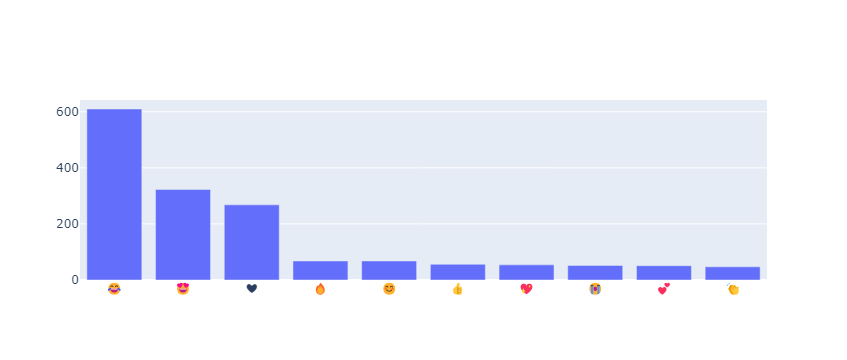

In [170]:
iplot([trace])

## 4. Collecting Entire data from the databases

### Importing OS

In [171]:
import os

### accesing the directory where the data is stored

In [172]:
files = os.listdir(r'C:\Users\Admin\Downloads\Youtube_project_shan_singh_Udemy\additional_data')

### Checking the types of the files in the directory

In [173]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

### seprating all the csv file into the list with the help of iteration

In [174]:
files_csv = [file for file in files if '.csv' in file]

### Checking in the list whether the csv files are stored or not

In [175]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

### Installing the warnings

In [176]:
!pip install pytest-warnings


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing the warnings and also the filterwarning and using the filterwarning

In [177]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### creating a dataframe where all the dataset will be concatenated and stored in the single file

In [178]:
full_df = pd.DataFrame()
path = r'C:\Users\Admin\Downloads\Youtube_project_shan_singh_Udemy\additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1', on_bad_lines = 'skip')
    full_df = pd.concat([full_df, current_df] , ignore_index=True)

### Checking the structure of the dataframe

In [179]:
full_df.shape

(375942, 16)

### Checking the shape of the duplicated data in the dataframe 

In [180]:
full_df[full_df.duplicated()].shape

(36417, 16)

### Dropping all the duplicate data from the dataframe

In [181]:
full_df = full_df.drop_duplicates()

### Checking whether the duplicated data has been dropped or not

In [182]:
full_df[full_df.duplicated()].shape

(0, 16)

### Checking the shape of the whole data

In [183]:
full_df.shape

(339525, 16)

##   5. Export data into csv, json, databases etc

### Conversion of a dataframe into the csv file 

In [184]:
full_df.to_csv(r'C:\Users\Admin\Downloads\Youtube_project_shan_singh_Udemy\Aryan_Youtube_sample_data/aryan_youtube_sample.csv', index=False)

### Conversion of a dataframe into the json file

In [185]:
full_df.to_json(r'C:\Users\Admin\Downloads\Youtube_project_shan_singh_Udemy\Aryan_Youtube_sample_data/aryan_youtube_sample.json')

### Conversion of dataframe into the sqllite file

### Installing sqlalchemy

In [186]:
!pip install sqlalchemy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing create_engine from sqlalchemy

In [187]:
from sqlalchemy import create_engine

### Creating a sqllite file

In [188]:
engine = create_engine(r'sqlite:///C:\Users\Admin\Downloads\Youtube_project_shan_singh_Udemy\Aryan_Youtube_sample_data/youtube_sample.sqlite')

### Exporting 1st 1000 data from dataframe to sqllite file

In [189]:
full_df[0:1000].to_sql('Users' , con=engine , if_exists = 'append')

1000

## 6. Most Likes on category 

### Showing first 5 data from the dataframe

In [190]:
full_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


### checking all the categories id in the data

In [191]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

### Reading the US category json file 

In [192]:
json_df = pd.read_json(r"C:\Users\Admin\Downloads\Youtube_project_shan_singh_Udemy\additional_data\US_category_id.json")

### Checking the json data file

In [193]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


### Checking Particular data from the json file

In [194]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [195]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

### Creating a dictionary in which we are going to iterate the data from the json file and append the required data for the analysis like category_id and category_name

In [196]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

### Checking Category dictionary

In [197]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

### Mapping and Adding the category_name into the datafram with the help of category_id

In [198]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

### Checking whether the Data Has been added or not

In [199]:
full_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


### box plotting the dataframe

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

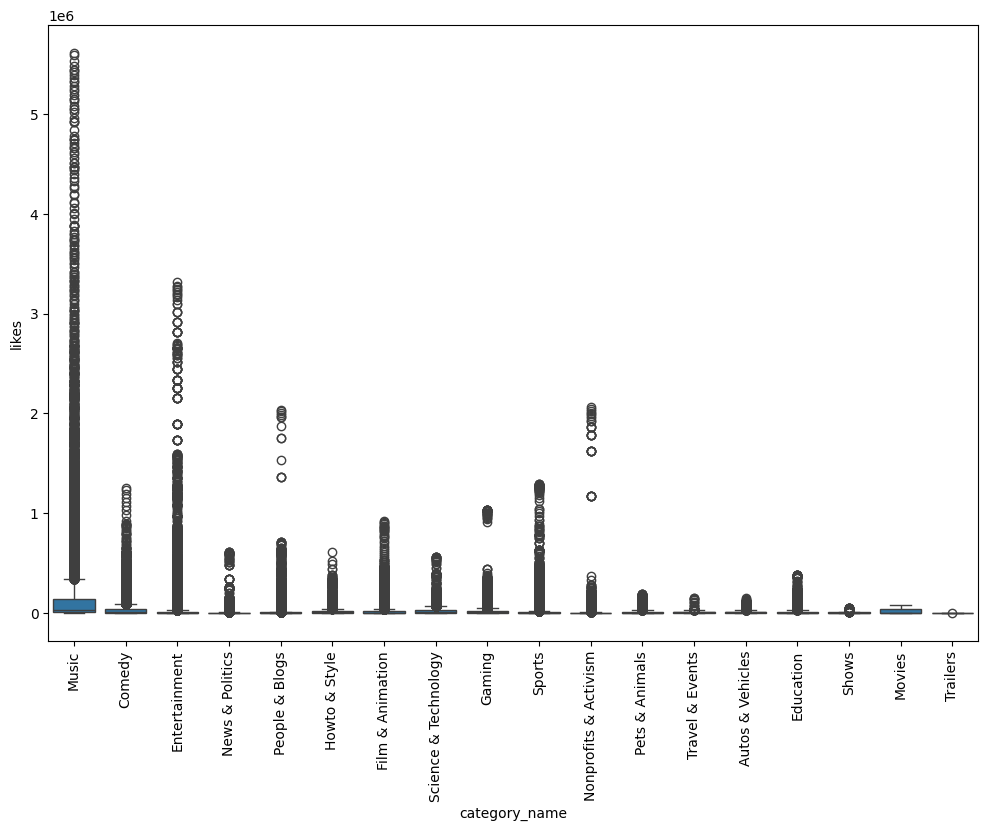

In [200]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'category_name', y='likes', data=full_df)
plt.xticks(rotation= 'vertical')

### 7. Audience Engagement 

### With this we are going to get the indight about the like_rate, comment_count_rate and dislike_rate 

In [201]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

### Checking the columns of the dataframe

In [202]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

### Plotting the boxplot of category_name and like_rate to find the engagement of the viewers

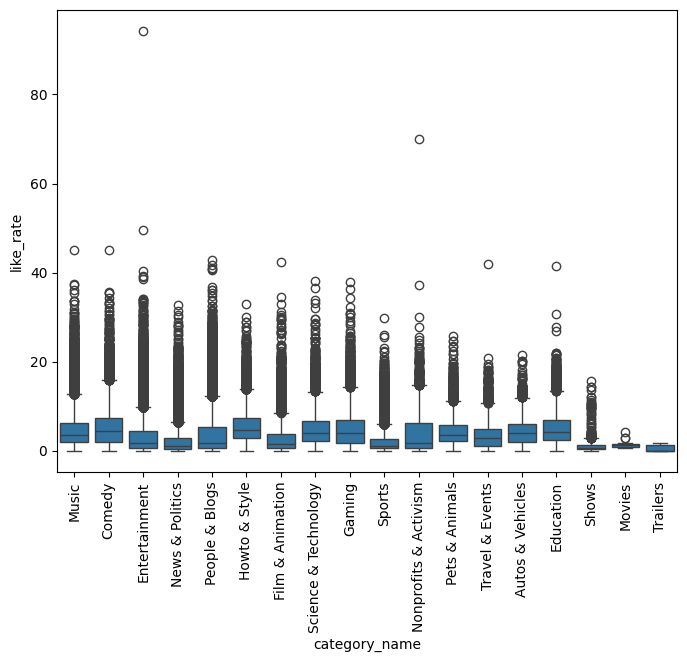

In [203]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'category_name', y='like_rate', data=full_df)
plt.xticks(rotation= 'vertical')
plt.show()

### Regression plot for showing the correlation between the view and the likes 

<Axes: xlabel='views', ylabel='likes'>

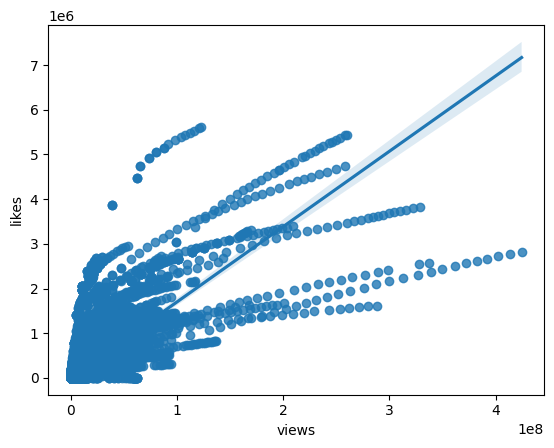

In [204]:
sns.regplot(x='views', y='likes', data= full_df)

### Checking the Columns in the dataframe

In [205]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

### Creating a correlation Matrix table 

In [206]:
full_df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


### Representation of the correlation matrix in a heatmap

<Axes: >

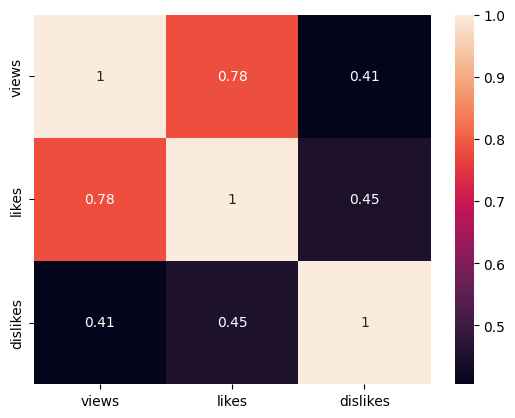

In [207]:
sns.heatmap(full_df[['views', 'likes' , 'dislikes']].corr(), annot=True)

## 8. Trending Videos on Youtube

### Checking the Data in the Dataframe

In [208]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


### It will return the frequency table of the channels

In [209]:
full_df['channel_title'].value_counts()


channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

### Its similar to the above line of code but in this we have converted it into the rows and columns as well as the sorting of the values are also done

In [210]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [211]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


### Rename the freqency of the vdeos column as a total_viedos column

In [212]:
cdf = cdf.rename(columns={0:'total_videos'})

In [213]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


### Importing the plotly.express 

In [214]:
import plotly.express as px

### Plotting the bar graph according to the total videos and the videos on the channel

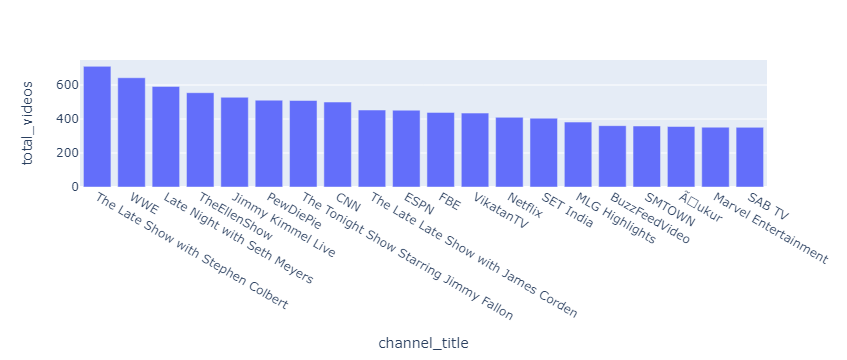

In [215]:
px.bar(data_frame = cdf[0:20] , x = 'channel_title' , y = 'total_videos')

##   9. Analysing the Punctuation Impact on views,likes, dislikes

### Checking the first title

In [216]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

### Importing the String Package

In [217]:
import string

### Checking the diffrent types of punctuation Marks

In [218]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Iterating the first title and cheecking if the punctuation exist in the above list the give the count of how many punctuation exist

In [219]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

### Creating the function for the iteration in the whole dataset

In [220]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

### Creating a sample of the whole dataset

In [221]:
sample = full_df[0:10000]

### Applying the function in th sample dataset

In [222]:
sample['count_punc'] = sample['title'].apply(punc_count)

### Checking the list of the punctuation count in a particular title

In [223]:
sample['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc, Length: 10000, dtype: int64

### Plotting the punction count with the view to get the correlation

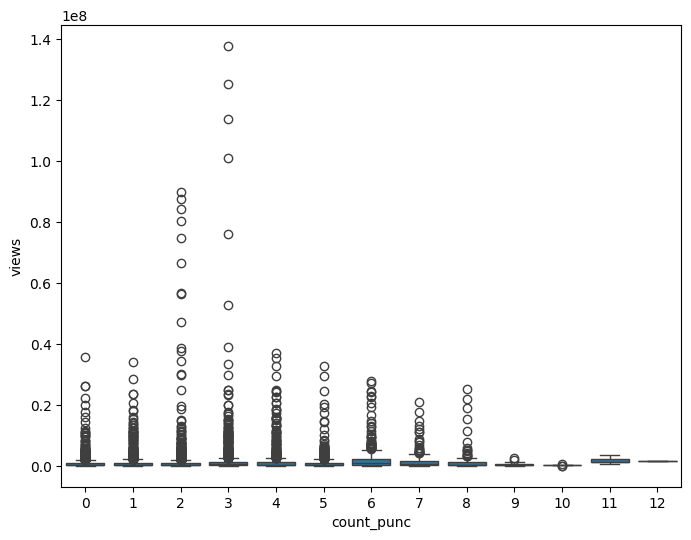

In [224]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'count_punc', y='views', data=sample)

plt.show()

### Plotting the punction count with the likes to get the correlation

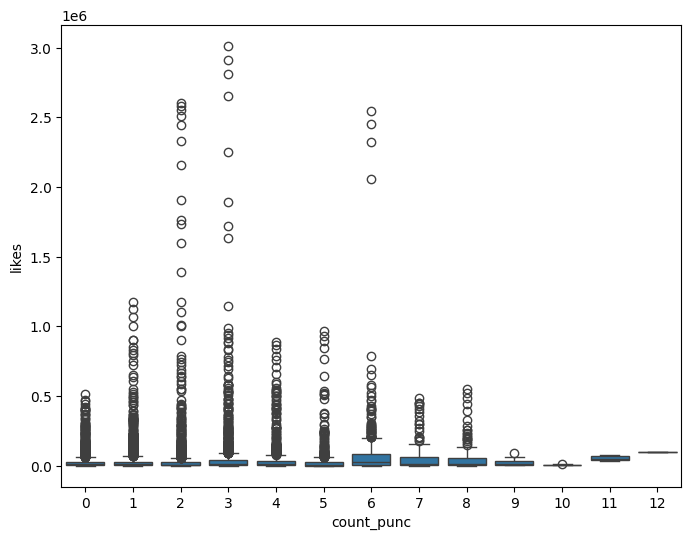

In [225]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'count_punc', y='likes', data=sample)
plt.show()

### Plotting the punction count with the dislikes to get the correlation

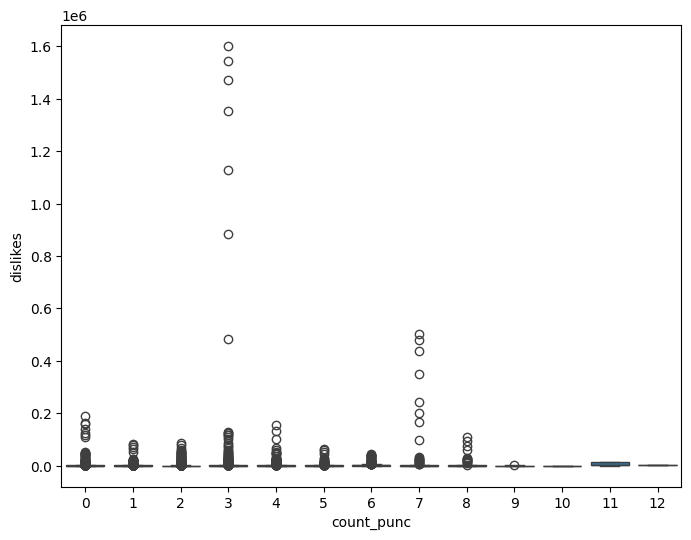

In [227]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'count_punc', y='dislikes', data=sample)
plt.show()